# One day multiple robot - visualization

Analize the result of an experiment that involves running multiple robots for one day in an environment. This experiment was specified by the exp/run of type __nrobot1day__. It is expected that the experiment was run by running the notebook nRobot1Day-Run, which means that the corresponding results had been left in the "results.pickle" file in the exp/run datadir. 

This notebook loads those results and visualizes them. 

In [1]:
import sys
sys.path.append("..")
from exp_run_config import Config
Config.PROJECTNAME = "WaterBerryFarms"

import pathlib
from pprint import pprint
import gzip as compress
import pickle

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from information_model import StoredObservationIM

from wbf_figures import end_of_day_graphs
import wbf_figures

In [2]:
# the experiment for the robot run
experiment = "nrobot1day"

# run = "two-random-robots"
# run = "two-communicating-robots"
# run = "mrmr-3random"
# run = "mrmr-3lawnmowers"
# run = "mrmr-lead-2bidders"
# run = "mrmr-1pioneer-2contractors"
run = "mrmr-1pio-2con-clustered"

exp = Config().get_experiment(experiment, run)
pprint(exp)

resultsfile = pathlib.Path(exp["data_dir"], "results.pickle")
if not resultsfile.exists():
    print(f"Results file does not exist:\n{resultsfile}")
    print("Run the notebook Run-1Robot1Day with the same exp/run to create it.")
    raise Exception("Nothing to do.")

# load the results file
with compress.open(resultsfile, "rb") as f:
    results = pickle.load(f)

***ExpRun**: Loading pointer config file:
	C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
***ExpRun**: Loading machine-specific config file:
	G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
***ExpRun**: No system dependent experiment file
	 G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\experiment-config\LotziYoga\nrobot1day\mrmr-1pio-2con-clustered_sysdep.yaml,
	 that is ok, proceeding.
***ExpRun**: Configuration for exp/run: nrobot1day/mrmr-1pio-2con-clustered successfully loaded
Experiment: {'velocity': 1, 'timesteps-per-day': 1000, 'time-start-environment': 25, 'im_resolution': 10, 'experiment_name': 'nrobot1day', 'name': '1 pioneer 2 contractors clustered', 'exp_environment': 'mrmr-custom-clustered', 'exp_estimator': 'adaptive-disk', 'exp_score': 'weighted_asymmetric', 'robots': [{'name': 'robot-pioneer', 'exp-policy': 'generic', 'exp-policy-extra-parameters': {'policy-name': 'mrmr-pioneer', 'policy-c

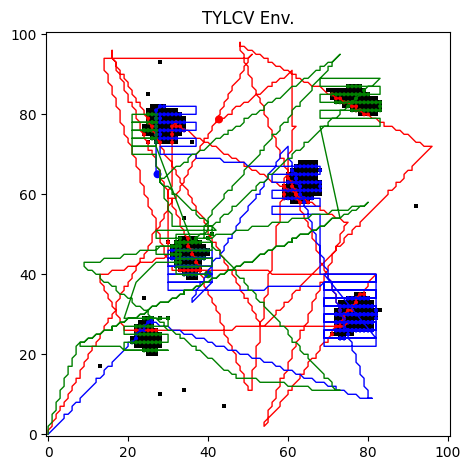

In [3]:

fig, ax = plt.subplots(1,1)
#wbf_figures.show_im_tylcv(results, ax)
wbf_figures.show_env_tylcv(results, ax)
#wbf_figures.show_unc_tylcv(results, ax)

#wbf_figures.show_im_ccr(results, ax)
#wbf_figures.show_env_ccr(results, ax)
#wbf_figures.show_unc_ccr(results, ax)

#wbf_figures.show_im_soil(results, ax)
#wbf_figures.show_env_soil(results, ax)
# wbf_figures.show_unc_soil(results, ax)


wbf_figures.show_robot_path(results, ax, draw_robot=True)
# show_detections_individual_robot(results, ax, 1)
wbf_figures.show_detections(results, ax, field="TYLCV")

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 44 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'H', 'L', 'R', 'S', 'T', 'V', 'Y', 'a', 'b', 'c', 'd', 'e', 'eight', 'five', 'four', 'h', 'hyphen', 'i', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'v', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 40, 43, 47, 53, 54, 55, 57, 60, 68, 69, 70, 71, 72, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 3228]
INFO:fontTools.subset:Cl

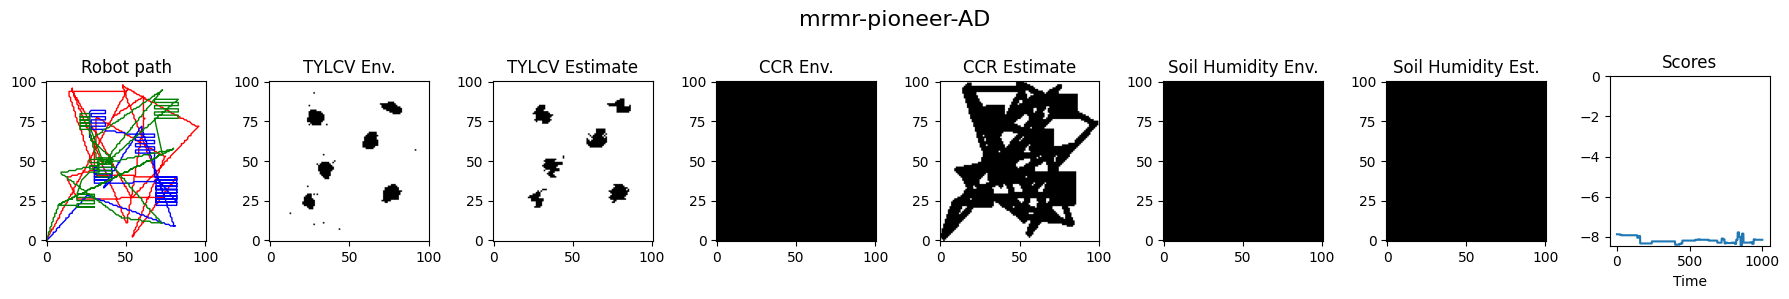

In [4]:
# a little hack to see if it can be just hacked to work
results["policy-name"] = results["robots"][0].policy_name

end_of_day_graphs(results, "daily-summary.pdf", plot_uncertainty = False)